# Projet : Manipulation d'images en Python "From Scratch"
Réalisé par: LARBI ASMAOUI
## Objectif
L'objectif de ce projet est de manipuler des images en utilisant des transformations "from scratch"



## 1.Installer les bibliothèques nécessaires

In [ ]:
!pip install opencv-python-headless matplotlib numpy

## 2.Chargement et affichage d'une image
Nous allons charger une image et l'afficher. Nous utiliserons `matplotlib` pour afficher l'image en RGB.

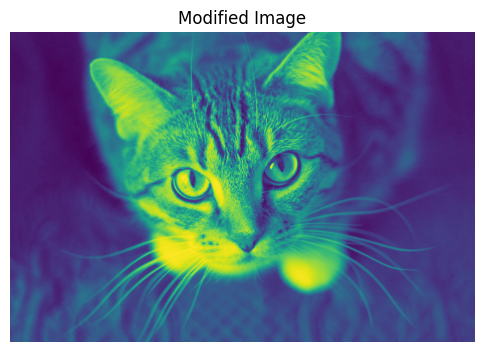

True

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_1_path = '/content/cat.jpg'
image_2_path = '/content/nature.jpg'

image_1 = cv2.imread(image_1_path)
image_2 = cv2.imread(image_2_path)

image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

grayscale_image = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6, 6))
plt.imshow(grayscale_image)
plt.title("Modified Image")
plt.axis('off')
plt.show()

cv2.imwrite('modified_image.jpg', grayscale_image)

## 3. Transformations élémentaires (from scratch)

* ### Addition et soustraction d'images

L'addition d'images consiste à additionner les pixels correspondants de deux images. Si les deux images ont des tailles différentes, il est nécessaire de les ajuster en les mettant à la même taille avant de les additionner. Lorsque l'addition est effectuée, si la somme des pixels dépasse la valeur maximale possible (255 pour une image en niveaux de gris ou en RGB), la valeur du pixel est "clippée" pour ne pas dépasser cette limite.

La soustraction d'images consiste à soustraire les valeurs des pixels de l'image 2 de celles de l'image 1. Comme pour l'addition, si les deux images ont des tailles différentes, il est nécessaire de les ajuster en les mettant à la même taille.


Nous utilisons `np.clip()` pour éviter les valeurs de pixel supérieures à 255.


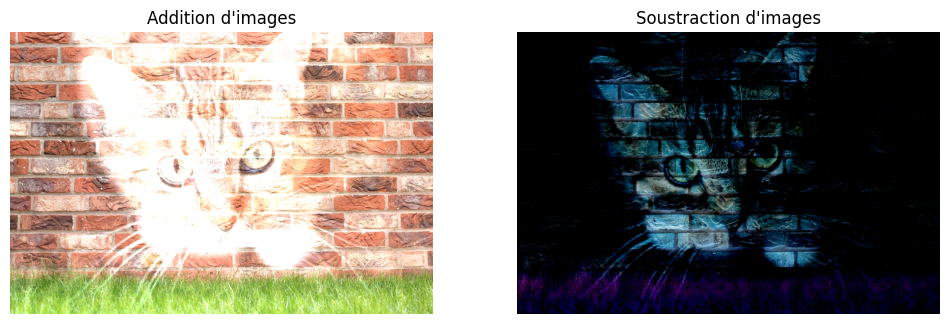

In [ ]:
def add_images(img1, img2):
    if img1.shape > img2.shape:
        img2 = np.pad(img2, ((0, img1.shape[0] - img2.shape[0]), (0, img1.shape[1] - img2.shape[1])), mode='constant')
    if img1.shape < img2.shape:
        img1 = np.pad(img1, ((0, img2.shape[0] - img1.shape[0]), (0, img2.shape[1] - img1.shape[1])), mode='constant')

    added_img = np.zeros_like(img1, dtype=np.uint8)
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
          for k in range(3):  # Pour les channels
            added_pixel_value = float(img1[i,j,k]) + float(img2[i,j,k])
            if added_pixel_value < 0:
                added_pixel_value = 0
            elif added_pixel_value > 255:
                added_pixel_value = 255
            added_img[i,j,k] = int(added_pixel_value)
    return added_img

def subtract_images(img1, img2):
    if img1.shape > img2.shape:
        img2 = np.pad(img2, ((0, img1.shape[0] - img2.shape[0]), (0, img1.shape[1] - img2.shape[1])), mode='constant')
    if img1.shape < img2.shape:
        img1 = np.pad(img1, ((0, img2.shape[0] - img1.shape[0]), (0, img2.shape[1] - img1.shape[1])), mode='constant')


    subtracted_img = np.zeros_like(img1, dtype=np.uint8)
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
          for k in range(3):  # Pour les channels
            added_pixel_value = float(img1[i,j,k]) - float(img2[i,j,k])
            if added_pixel_value < 0:
                added_pixel_value = 0
            elif added_pixel_value > 255:
                added_pixel_value = 255
            subtracted_img[i,j,k] = int(added_pixel_value)
    return subtracted_img

added_image = add_images(image_1, image_2)
subtracted_image = subtract_images(image_1, image_2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(added_image)
plt.title("Addition d'images")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(subtracted_image)
plt.title("Soustraction d'images")
plt.axis('off')
plt.show()

* ### Multiplication par un scalaire
Dans cette transformation, chaque pixel de l'image est multiplié par un scalaire. Si la multiplication dépasse 255, elle sera limitée à 255.



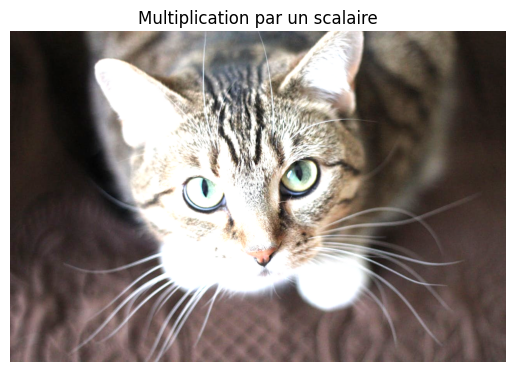

In [ ]:
def multiply_scalar(img, scalar):
    multiplied_img = np.zeros_like(img, dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(3):  # Pour les channels
                multiplied_pixel_value = int(img[i,j,k] * scalar)
                if multiplied_pixel_value < 0:
                    multiplied_pixel_value = 0
                if multiplied_pixel_value > 255:
                    multiplied_pixel_value = 255
                multiplied_img[i,j,k] = multiplied_pixel_value

    return multiplied_img

multiplied_image = multiply_scalar(image_1, 1.5)

plt.imshow(multiplied_image)
plt.title("Multiplication par un scalaire")
plt.axis('off')
plt.show()

* ### Translation (déplacement)
La translation déplace l'image selon des valeurs spécifiées pour x et y.



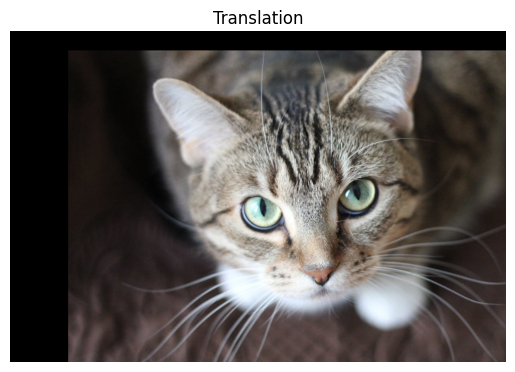

In [ ]:
def translate_image_from_scratch(img, tx, ty):
    rows, cols = img.shape[:2]
    translated_img = np.zeros_like(img, dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            new_i = i + ty
            new_j = j + tx
            if 0 <= new_i < rows and 0 <= new_j < cols:
                translated_img[new_i, new_j] = img[i, j]


    return translated_img

translated_image = translate_image_from_scratch(image_1, 150, 50)

plt.imshow(translated_image)
plt.title("Translation")
plt.axis('off')
plt.show()


* ### Rotation (rotation autour du centre)
La rotation permet de faire pivoter l'image autour de son centre d'un certain angle.


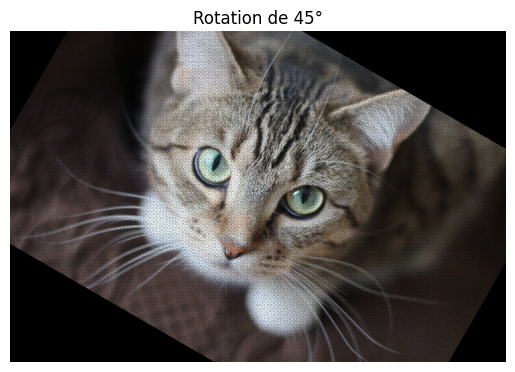

In [3]:

def rotate_image(image, angle_degrees):

    # Convert angle to radians
    angle_radians = np.deg2rad(angle_degrees)

    height = len(image)
    width = len(image[0]) if height > 0 else 0

    # Calculate center of the image
    center_x = width // 2
    center_y = height // 2

    rotated_image = np.zeros_like(image)

    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)

    for y in range(height):
        for x in range(width):
            translated_x = x - center_x
            translated_y = y - center_y

            rotated_x = int(cos_theta * translated_x - sin_theta * translated_y)
            rotated_y = int(sin_theta * translated_x + cos_theta * translated_y)

            new_x = rotated_x + center_x
            new_y = rotated_y + center_y

            # Ensure the new coordinates are within the image bounds
            if 0 <= new_x < width and 0 <= new_y < height:
                rotated_image[new_y][new_x] = image[y][x]

    return rotated_image

# Tester avec une rotation
rotated_image = rotate_image(image_1, 30)

plt.imshow(rotated_image)
plt.title("Rotation de 45°")
plt.axis('off')
plt.show()

## 5. Fonctions avancées (from scratch)

* ### Calcul de l'histogramme
L'histogramme d'une image est une représentation graphique qui montre la répartition des intensités de pixels (0-255) pour chaque canal de couleur (R, G, B).

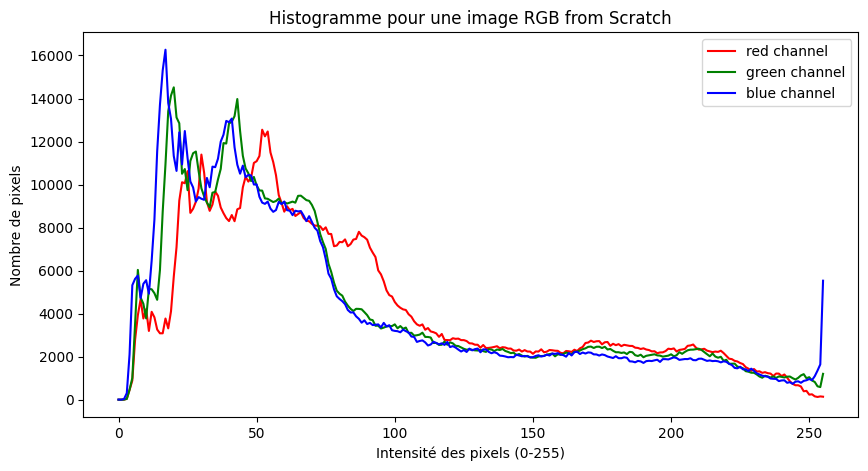

In [6]:
def calculate_histogram(img):
    red_histogram = [0] * 256
    green_histogram = [0] * 256
    blue_histogram = [0] * 256

    for row in img:
        for pixel in row:
            red, green, blue = pixel  # Extract the RGB values of the pixel
            red_histogram[red] += 1
            green_histogram[green] += 1
            blue_histogram[blue] += 1

    return red_histogram, green_histogram, blue_histogram


plt.figure(figsize=(10, 5))

r_hist, g_hist, b_hist = calculate_histogram(image_1)


plt.plot(r_hist, color="red", label=f'red channel')
plt.plot(g_hist, color="green", label=f'green channel')

plt.plot(b_hist, color="blue", label=f'blue channel')


plt.title("Histogramme pour une image RGB from Scratch")
plt.xlabel("Intensité des pixels (0-255)")
plt.ylabel("Nombre de pixels")
plt.legend()
plt.show()


* ### Histogramme cumulé
L'histogramme cumulé est obtenu en cumulant les fréquences des intensités de pixels. Il est utile pour l'égalisation de l'image.

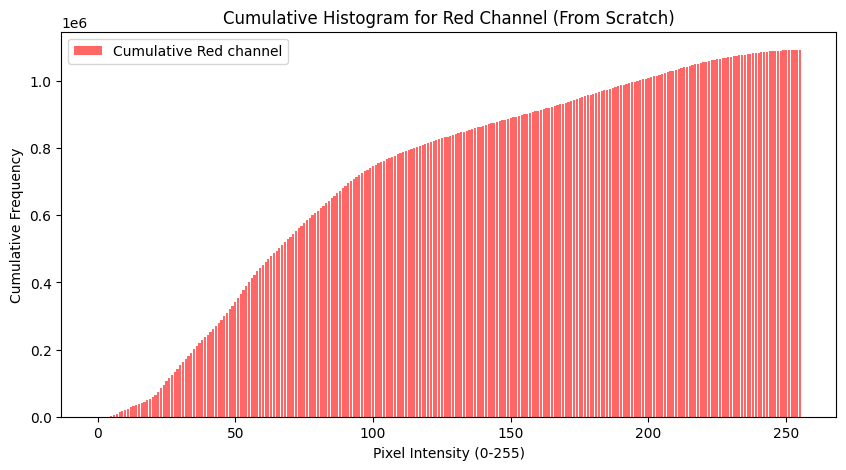

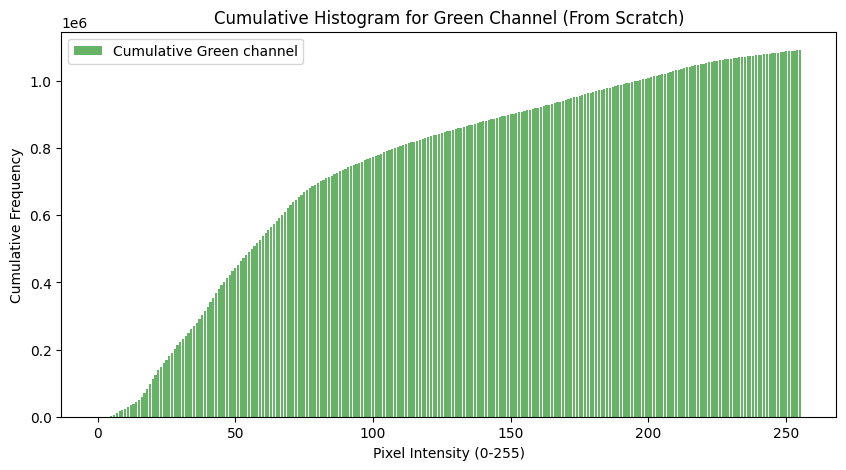

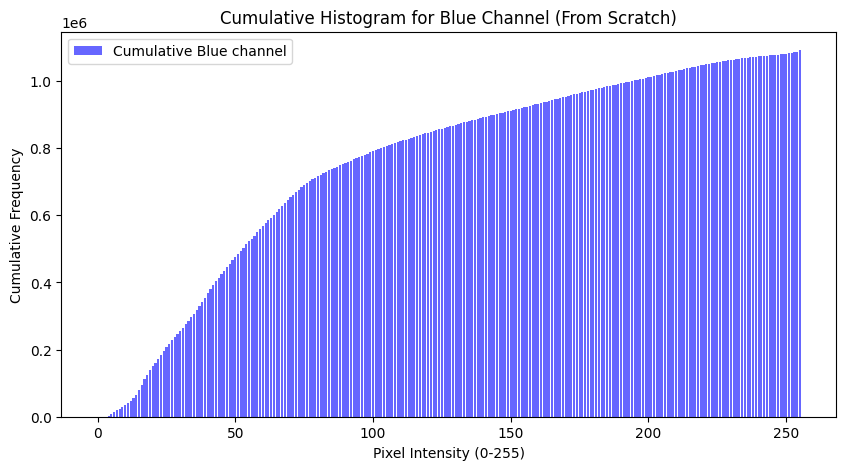

In [8]:
def calculate_cumulative_histogram(histogram):
    cumulative_hist = [0] * 256
    cumulative_hist[0] = histogram[0]

    for i in range(1, 256):
        cumulative_hist[i] = cumulative_hist[i - 1] + histogram[i]

    return cumulative_hist

r_cumulative = calculate_cumulative_histogram(r_hist)
g_cumulative = calculate_cumulative_histogram(g_hist)
b_cumulative = calculate_cumulative_histogram(b_hist)

plt.figure(figsize=(10, 5))

plt.bar(range(256), r_cumulative, color="red", alpha=0.6, label='Cumulative Red channel')
plt.title("Cumulative Histogram for Red Channel (From Scratch)")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Cumulative Frequency")
plt.legend()
plt.show()

# Green Channel Cumulative Histogram
plt.figure(figsize=(10, 5))
plt.bar(range(256), g_cumulative, color="green", alpha=0.6, label='Cumulative Green channel')
plt.title("Cumulative Histogram for Green Channel (From Scratch)")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Cumulative Frequency")
plt.legend()
plt.show()

# Blue Channel Cumulative Histogram
plt.figure(figsize=(10, 5))
plt.bar(range(256), b_cumulative, color="blue", alpha=0.6, label='Cumulative Blue channel')
plt.title("Cumulative Histogram for Blue Channel (From Scratch)")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Cumulative Frequency")
plt.legend()
plt.show()


* ### Recadrage de la dynamique (Normalisation des niveaux de gris)
La normalisation des niveaux de gris étend les valeurs de pixel à toute la plage [0, 255], améliorant ainsi le contraste de l'image.

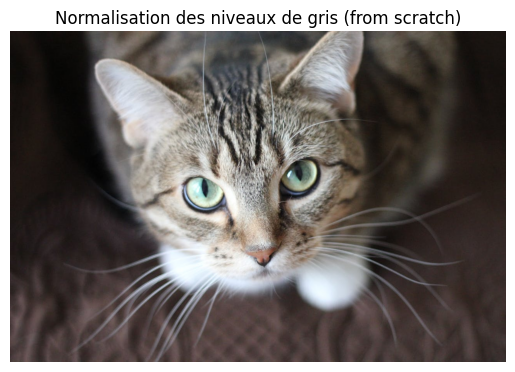

In [9]:
def normalize_gray_levels(img):
    min_val, max_val = img.min(), img.max()
    normalized_img = ((img - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    return normalized_img

normalized_image = normalize_gray_levels(image_1)

plt.imshow(normalized_image)
plt.title("Normalisation des niveaux de gris (from scratch)")
plt.axis('off')
plt.show()

* ### Seuillage (Binarisation de l'image)
La binarisation transforme une image en niveaux de gris en une image binaire où les pixels sont soit noirs (0) soit blancs (255), selon un seuil donné.

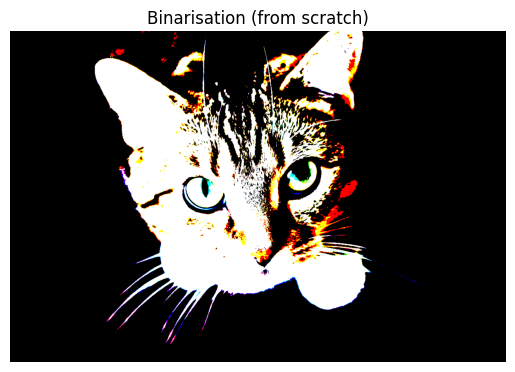

In [ ]:
def binarisation_image(img, taux):
    img = np.where(img > taux, 255, 0).astype(np.uint8)
    return img

taux_binarisation = 128
image_binaire = binarisation_image(image_1, taux_binarisation)

plt.imshow(image_binaire)
plt.title("Binarisation (from scratch)")
plt.axis('off')
plt.show()

* ###  Inversion des couleurs de l'image
Cette opération inverse les couleurs d'une image : les pixels noirs deviennent blancs et vice versa.


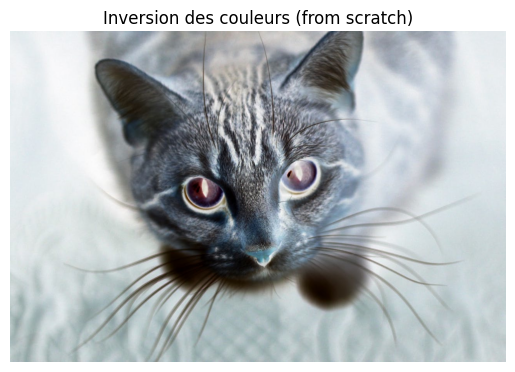

In [ ]:
def invert_colors(img):
    return 255 - img

inverted_image = invert_colors(image_1)

plt.imshow(inverted_image)
plt.title("Inversion des couleurs (from scratch)")
plt.axis('off')
plt.show()

* ### Égalisation de l'histogramme
L'égalisation redistribue les intensités pour améliorer le contraste.



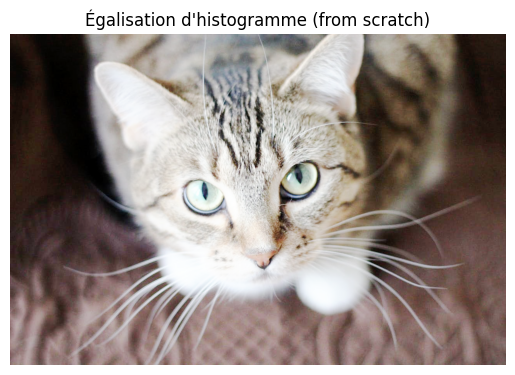

In [ ]:
def equalisation_histogramme(img):
    hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])
    cdf = hist.cumsum()
    cdf_normalise = cdf * 255 / cdf[-1]
    img_equalise = np.interp(img.flatten(), bins[:-1], cdf_normalise)
    return img_equalise.reshape(img.shape).astype(np.uint8)

img_equalise = equalisation_histogramme(image_1)

plt.imshow(img_equalise)
plt.title("Égalisation d'histogramme (from scratch)")
plt.axis('off')
plt.show()

* ### Transformation exponentielle
Cette transformation amplifie les faibles intensités et diminue les intensités élevées.


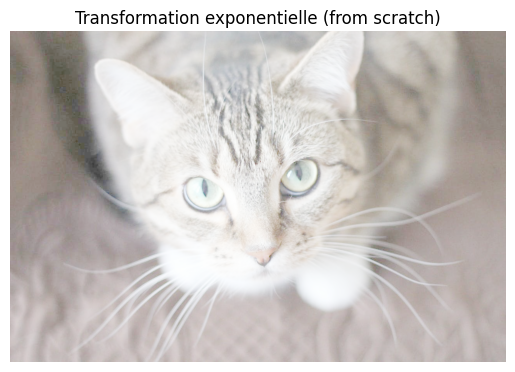

In [ ]:
def exponential_transform(img, c):
    transformed_img = c * np.log1p(img)
    normalized_img = normalize_gray_levels(transformed_img)  # Normaliser
    return normalized_img

c = 1
exp_image = exponential_transform(image_1, c)

plt.imshow(exp_image)
plt.title("Transformation exponentielle (from scratch)")
plt.axis('off')
plt.show()